# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #2


*   Youtube Lecture #4-8
*   Written by Seungeun Lee

### Notice for Python
##### If you are new to Python, please follow the Youtube link below:
##### https://youtube.com/playlist?list=PLGPF8gvWLYyrkF85itdBHaOLSVbtdzBww
##### You really don't have to understand everything in this video!! Just get a feel for Python:)
##### If you have any trouble installing Python3, just use online python compiler -- I recommend https://www.programiz.com/python-programming/online-compiler/

## 1. Gradient Descent





##### Reference. https://teddylee777.github.io/scikit-learn/gradient-descent/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Quick Question

## What is numpy and matplotlib?
## Google it and write the answer

## Your Answer
'''
numpy는 파이썬에서 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리입니다.
matplotlib는 데이터 시각화와 그래프를 그리는 데에 가용되는 파이썬 라이브러리입니다.
'''

'\nnumpy는 파이썬에서 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리입니다.\nmatplotlib는 데이터 시각화와 그래프를 그리는 데에 가용되는 파이썬 라이브러리입니다. \n'

In [3]:
# Let's make a linear function
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): ## This is a 'function' name 'make_linear' - we're going to use this function later on
    x = np.random.rand(size) # random x
    y = w * x + b # y=wx+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # random noise
    yy = y + noise # adding random noise to y
    plt.figure(figsize=(10, 7)) # plotting the figure - figure size
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}') # plot x in x-axis, y in y-axis, and label -- line plot
    plt.scatter(x, yy, label='data') ## plot x in x-axis, yy (y+noise) in y-axis -- scatter plot
    plt.legend(fontsize=20) ## setting legend's fontsize
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy ## The function make_linear will return the value x and yy in the end


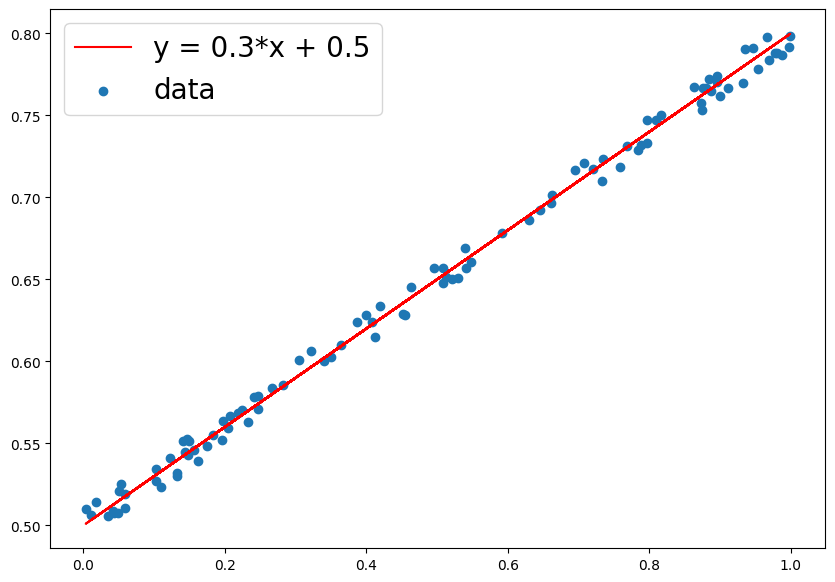

w: 0.3, b: 0.5


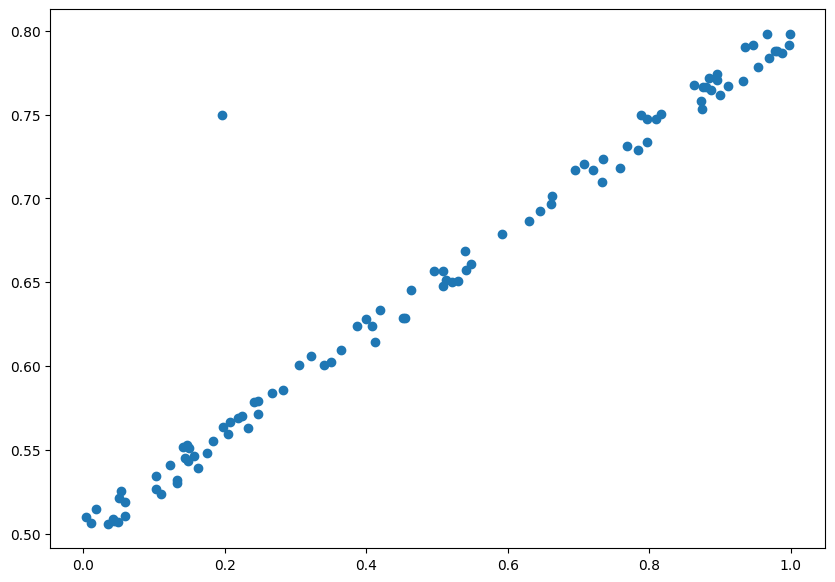

In [4]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) ## Here we use the function make_linear -> first figure: line + scatter plot

## Intentionally making 1 outlier
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y) ## second figure: only scatter plot
plt.show()

In [5]:
## randomly choose w and b
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [6]:
## y_hat: prediction
y_hat = w * x + b

## Loss function
error = (y_hat - y) ** 2

In [7]:
## Quick Question
## (1) Write a name of the loss function above. HInt: _ _ _ Loss

## (2) Is it okay to use 'error = (y_hat-y)' or 'error = np.abs(y_hat-y)'?
## Write your own answer and justify your choice.

## Your Answer
## (1)
'''
MSE(Mean Square Error) loss 입니다
'''
## (2)
'''
loss 함수로 (y_hat-y)를 쓰면, 값이 음수 또는 양수가 나와 서로 상쇄되어
사라질 수 있기 떄문에 오차율을 계산 할 때에는 사용하기 부적절하다.

또한, np.abs(y_hat-y)를 쓰면, (y_hat-y)를 썼을 때 생기는 문제는 해결 될 수 있지만
나중에 경사하강법을 이용할 때 오차함수의 미분이 어려워지기 때문에 오차율을 계산 할 때에는 사용하기 부적절하다.
'''

'\nloss 함수로 (y_hat-y)를 쓰면, 값이 음수 또는 양수가 나와 서로 상쇄되어 \n사라질 수 있기 떄문에 오차율을 계산 할 때에는 사용하기 부적절하다.\n\n또한, np.abs(y_hat-y)를 쓰면, (y_hat-y)를 썼을 때 생기는 문제는 해결 될 수 있지만\n나중에 경사하강법을 이용할 때 오차함수의 미분이 어려워지기 때문에 오차율을 계산 할 때에는 사용하기 부적절하다.\n'

In [8]:
# Epoch (# of iterations)
num_epoch = 5000

# Learning rate
learning_rate = 0.5

In [9]:
## Quick Question
## (1) What is epoch? Google it and write your own answer in detail.
## (2) What is learning rate? Google in and write your own answer.

## Your Answer
## (1)
'''
epoch는 전체 train 데이터 셋이 신경망을 통과한 횟수를 의미합니다. iteration하고 epoch는 서로 다른 의미를 지니고 있는데
epoch는 전체 train 데이터 셋이 신경망을 통과한 횟수를 의미한다면, iteration은 한 번의 epoch를 마치는데 필요한 미니배치의 갯수를
의미합니다. 각 미니배치 마다 파라미터의 업데이트가 진행되므로 iteration은 한 epoch에서 일어나는 파라미터 업데이트의 횟수라고도 할 수 있습니다.
'''
## (2)
'''
learning rate는 파라이터를 업데이트할 때 loss 함수의 미분값에 곱해주는 값으로, 한 번 학습할 때 얼마 만큼 학습을 해야하는지
정해주는 값입니다.
이는 하이퍼 파라미터이며 따라서 사용자가 직접 올바른 값을 입력해주어야 합니다. 만약 너무 높은 값으로 설정한다면, gradient 값이 발산될 수도 있고,
너무 낮은 값으로 설정한다면, gradient 값이 0으로 수렴하는 데에 너무 오래 걸리거나 local minimum에 빠져 안좋은 결과를 얻을 수도 있습니다.
'''

'\nlearning rate는 파라이터를 업데이트할 때 loss 함수의 미분값에 곱해주는 값으로, 한 번 학습할 때 얼마 만큼 학습을 해야하는지\n정해주는 값입니다. \n이는 하이퍼 파라미터이며 따라서 사용자가 직접 올바른 값을 입력해주어야 합니다. 만약 너무 높은 값으로 설정한다면, gradient 값이 발산될 수도 있고,\n너무 낮은 값으로 설정한다면, gradient 값이 0으로 수렴하는 데에 너무 오래 걸리거나 local minimum에 빠져 안좋은 결과를 얻을 수도 있습니다.\n'

In [10]:
## Question 1
errors = []
# w, b: random initialization -- result may vary each time you execute the code
w = np.random.uniform(low=-1.0, high=1.0) # 가중치 초기화
b = np.random.uniform(low=-1.0, high=1.0) # 가중치 초기화

for epoch in range(num_epoch): # 설정해둔 epoch의 수 만큼 반복하여 돌림
    y_hat = x * w + b # 초기화 해둔 가중치를 이용하여 값을 예측한다.

    error = ((y_hat - y)**2).mean() # 예측한 값과 실제 값 사이의 오차를 MSE를 이용하여 계산한다.
    if error < 0.0005: # 오차가 0.0005 미만이라면, 반복문을 그만 돌린다.
        break

    w = w - learning_rate * ((y_hat - y) * x).mean() # MSE를 w에 대하여 편미분한 값에 learning rate를 곱하여 파라미터를 업데이트 해준다.
    b = b - learning_rate * (y_hat - y).mean() # MSE를 b에 대하여 편미분한 값에 learing rate를 곱하여 파라미터를 업데이트 해준다.

    errors.append(error) # error를 저장하는 배열에 한 epoch 마다의 error 값을 append 함수를 이용하여 저장해준다.

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error)) # epoch가 5의 배수일 때마다 epoch, w, b, error의 값을 출력해준다.

print("----" * 15) # 구별을 위한 구별선
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error)) # 기본적인 경사하강법을 이용하여 구한 파라미터 값을 출력해준다.

 0 w = 0.45831, b = 0.22447 error = 0.27390
 5 w = 0.49095, b = 0.39932 error = 0.00497
10 w = 0.45362, b = 0.42045 error = 0.00338
15 w = 0.42295, b = 0.43670 error = 0.00235
20 w = 0.39813, b = 0.44985 error = 0.00168
25 w = 0.37803, b = 0.46049 error = 0.00123
30 w = 0.36177, b = 0.46910 error = 0.00094
35 w = 0.34861, b = 0.47607 error = 0.00075
40 w = 0.33796, b = 0.48171 error = 0.00063
45 w = 0.32934, b = 0.48627 error = 0.00055
------------------------------------------------------------
50 w = 0.3, b = 0.5 error = 0.00049


### Question 1. Please write a line-by-line explanation of the code above.


*   Use '#' for Python!
*   ChatGPT allowed :) -- but please try to understand the code

## 2. Let's practice numpy

In [11]:
import numpy as np ## np: abbreviation of numpy (convention)

In [12]:
arr = np.array([1,2,3]) # numpy array
print(arr)

[1 2 3]


In [13]:
arr2 = np.array([[1,2,3], [4,5,6]]) # numpy array
print(arr2)

[[1 2 3]
 [4 5 6]]


In [14]:
arr3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Quick Question (Optional)
##### https://datascienceschool.net/01%20python/03.01%20%EB%84%98%ED%8C%8C%EC%9D%B4%20%EB%B0%B0%EC%97%B4.html
##### Read and summarize the document above.

In [15]:
## Let's check their data type
## numpy.ndarray (n*d array)
print(type(arr))
print(type(arr2))
print(type(arr3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
## .shape returns the shape of the numpy array
print(arr.shape) # (3, ) -> because it's 1d array (vector)
print(arr2.shape) # matrix
print(arr3.shape) # matrix

(3,)
(2, 3)
(3, 3)


In [17]:
## How to make numpy array more conveniently?
print(np.ones((2,3))) ## ONES!!
print(2*np.ones((2,3))) ## TWOS!!

[[1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [18]:
print(np.zeros((2,3))) ## ZEROS!!
## Of course...
print(0*np.ones((2,3))) ## ZEROS!!

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [19]:
## Reshaping numpy array
arr12 = np.ones((3,4))
arr12.reshape(1, 12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [20]:
## But what if we do not know (or do not want to know; it's lazy... but anyway) the exact size of numpy array?
## Use -1

arr12.reshape(-1, 12) ## same result!

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [21]:
## It's quite obvious but...
arr12.reshape(-1, 5) ## this does not work

ValueError: cannot reshape array of size 12 into shape (5)

In [22]:
## Sorting the values
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed, ))

[1 2 3 5]


### Question 2. Sorting with numpy
##### (1) We've just sorted the vector in increasing order. Can you sort the same vector in decreasing order?
##### (2) Read the document for np.argsort (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html). Explain the numpy argsort function and execute the code with arr_mixed.

In [23]:
# (1)답
print(np.sort(arr_mixed)[::-1]) # 파이썬 문법의 일종으로 파이썬은 배열을 [start:stop:step] 으로 슬라이싱할 수 있다.
# 여기서 [::-1]이란 배열의 맨 끝에서 부터 하나의 원소씩 거꾸로 출력해준다는 의미 이므로 np.sort 적용후 [::-1]을 써주면, 내림차순으로 출력할 수 있다.

# (2)답
print(np.argsort(arr_mixed)) # argsort는 정렬된 행렬의 인덱스를 출력해주는 함수이다.

[5 3 2 1]
[0 2 3 1]


In [24]:
## Indexing
arr4 = np.array([5,2,3,4,6])
print(arr4[1]) ## index starts with 0

2


In [25]:
## Slicing
arr4[1:3] ## Including 1st entry, excluding 3rd entry

array([2, 3])

In [26]:
## Quick Question
## Write a code that slices arr4 from 1st entry to 4th entry. HInt: including 1st entry, excluding 5th entry

## Your Answer
print(arr4[1:5])


[2 3 4 6]


## 3. Let's practice matplotlib

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# this command let us view the figure in the jupyter notebook directly

[1, 2, 3]


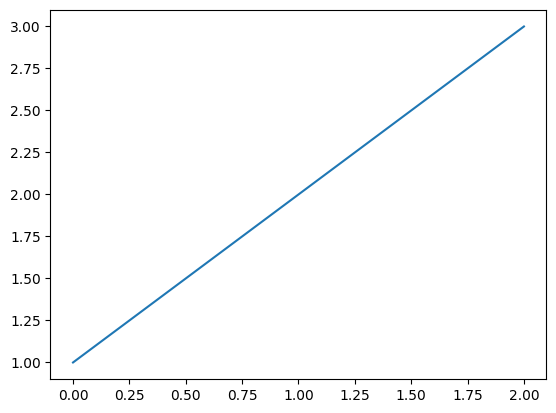

In [28]:
x = [1, 2 , 3]
print(x) # list with 1, 2, and 3
plt.plot(x) # matplotlib regard this as y-axis: 1, 2, 3 (the value given) -> corresponding x-axis: 0, 1, 2 (starting from 0, having 3 elements)

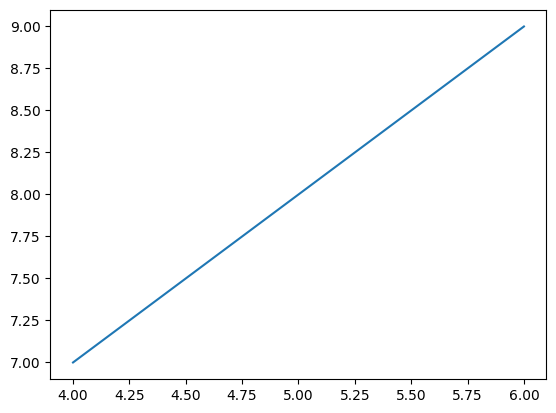

In [29]:
## But what if we specify the elements of x-axis?
x = [4, 5, 6]
y = [7, 8, 9]
plt.plot(x, y)

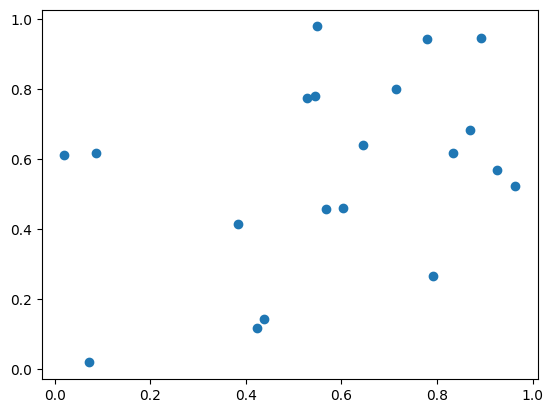

In [30]:
# We can also draw a scatter plot
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.show()

<ipython-input-31-e35ee8606cf1>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.5, cmap='Spectral') ## alpha? cmap?


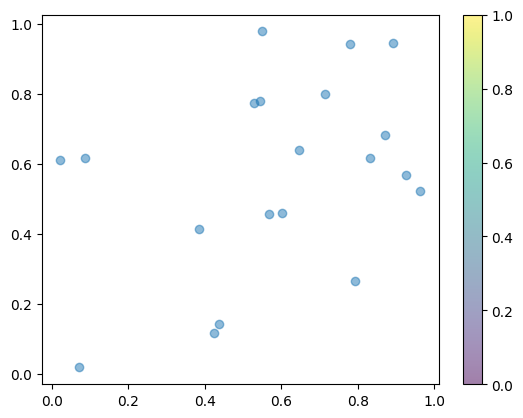

In [31]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.5, cmap='Spectral') ## alpha? cmap?
plt.colorbar()
plt.show()

<ipython-input-32-c9524a418915>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.1, cmap='Spectral') ## alpha? cmap?


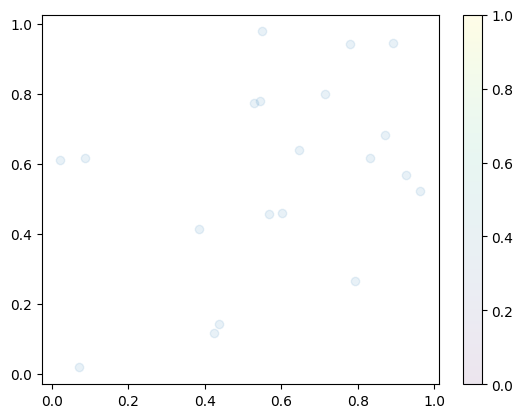

In [32]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.1, cmap='Spectral') ## alpha? cmap?
plt.colorbar()
plt.show()

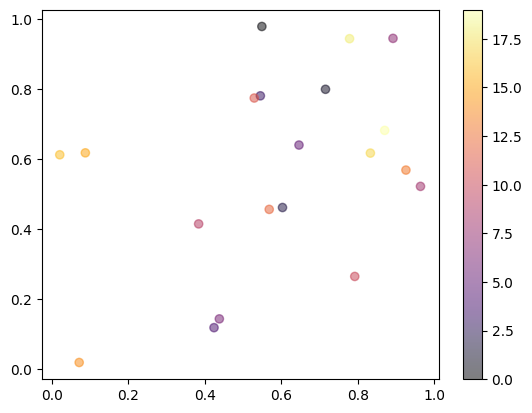

In [33]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, c=np.arange(n),alpha=0.5, cmap='inferno') ## alpha? cmap?
plt.colorbar()
plt.show()

### Question 3. Matplotlib
##### (1) What is alpha and cmap above? Google it and write the answer.
##### (2) Write and execute a code that has alpha=0.1. Can you see the difference?
##### (3) Check the type of cmap and run the code that changed the type of cmap.

In [34]:
'''
(1)답
alpha는 마커의 투명도를 뜻합니다. cmap은 파라미터에 컬러맵에 해당하는 문자열을 지정할 수 있습니다.
(2)답
alpha를 0.1로 설정해주면, alpha가 0.5일 때보다 마커가 더 흐리게 보입니다.
(3)답
cmap을 inferno로 변경해주면 색이 빨간색으로 변한다.
'''

'\n(1)답\nalpha는 마커의 투명도를 뜻합니다. cmap은 파라미터에 컬러맵에 해당하는 문자열을 지정할 수 있습니다. \n(2)답\nalpha를 0.1로 설정해주면, alpha가 0.5일 때보다 마커가 더 흐리게 보입니다.\n(3)답\ncmap을 inferno로 변경해주면 색이 빨간색으로 변한다. \n'

## Notice
### Lecture 4-8 also covers backpropagation and vanishing gradient descent problem
### But we'll stop here this week! HAPPY NEW YEAR :)

### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment2

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory
*   코드 실행 결과 전체를 담은 파일을 업로드 해주세요!

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60